<a href="https://colab.research.google.com/github/davidjustin1974/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [0]:
cell_phones.dtypes

In [0]:
population.dtypes

In [0]:
geo_country_codes.dtypes

In [0]:
cell_phones.head()

In [0]:
population.head()

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
merge003 = pd.merge(cell_phones,population)

In [54]:
merge003.shape

(8590, 4)

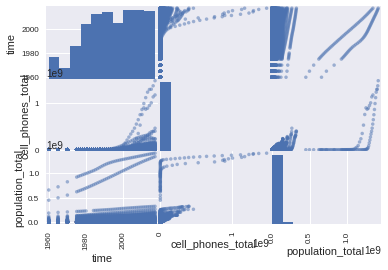

In [55]:
pd.plotting.scatter_matrix(merge003);

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
merge003['geo']= merge003['geo'].str.upper()

In [59]:
merge003.head()

,geo,time,cell_phones_total,population_total,Cell Phones Per Person
0,AFG,1960,0.0,8996351,0.0
1,AFG,1965,0.0,9938414,0.0
2,AFG,1970,0.0,11126123,0.0
3,AFG,1975,0.0,12590286,0.0
4,AFG,1976,0.0,12840299,0.0


In [60]:
merge003.isnull().sum()

geo                       0
time                      0
cell_phones_total         0
population_total          0
Cell Phones Per Person    0
dtype: int64

In [0]:
merge003['Cell Phones Per Person']=merge003['cell_phones_total']/merge003['population_total']

In [0]:
filter2017 = merge003[merge003["time"]==2017]

In [0]:
filterUSA2017 = filter2017[filter2017["geo"]=='USA']

In [69]:
filterUSA2017

,geo,time,cell_phones_total,population_total,Cell Phones Per Person
8134,USA,2017,395881000.0,324459463,1.220125


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [79]:
filter2017.head()

,geo,time,cell_phones_total,population_total,Cell Phones Per Person
45,AFG,2017,23929713.0,35530081,0.673506
91,AGO,2017,13323952.0,29784193,0.447350
137,ALB,2017,3497950.0,2930187,1.193763
183,AND,2017,80337.0,76965,1.043812
219,ARE,2017,19826224.0,9400145,2.109140


In [0]:
filter2017.rename(columns={
     'geo': 'country',
     'cell_phones_total': 'cell phones total'})

In [84]:
filter2017.columns.tolist()

['geo',
 'time',
 'cell_phones_total',
 'population_total',
 'Cell Phones Per Person']

In [0]:
top5in2017 = filter2017[['geo','cell_phones_total']]

In [0]:
top5in2017

In [0]:
top5in2017.rename(columns={
     'geo': 'country',
     'cell_phones_total': 'cell phones total'})

In [0]:
top5in2017sort = top5in2017.sort_values(by='cell_phones_total',ascending=False)

In [121]:
top5in2017sort.rename(columns={
     'geo': 'country',
     'cell_phones_total': 'cell phones total'})

,country,cell phones total
1496,CHN,1.474097e+09
3595,IND,1.168902e+09
3549,IDN,4.589232e+08
8134,USA,3.958810e+08
1084,BRA,2.364885e+08
6636,RUS,2.273419e+08
3990,JPN,1.701285e+08
718,BGD,1.451137e+08
5748,NGA,1.449202e+08
6104,PAK,1.445256e+08


In [122]:
#Could not get value_counts to work for the life of me.
#Tried changing geo to country and cell_phones_total to cell phones total
#and it kept changing back to geo and cell_phones_total

top5in2017sort.head()

,geo,cell_phones_total
1496,CHN,1.474097e+09
3595,IND,1.168902e+09
3549,IDN,4.589232e+08
8134,USA,3.958810e+08
1084,BRA,2.364885e+08


In [0]:
#Could not get value_counts to work for the life of me.
#Tried changing geo to country and cell_phones_total to cell phones total
#and it kept changing back to geo and cell_phones_total

In [0]:
#Still leaving this up even if I finish!!!  2:25 PM 3/29/2019


#I realize that I'm supposed to pull the 2017 data out for every country
#then sort it by whoever had the most cell phones
#not proficent enough with coding right now.

#Feel very overwhelmed.
#To me?  Its like being given an english to japanese dictionary 
#and being told to write a novel in an hour.

#I barely grasp merging the data, let alone sorting it, manipulating it,
#and getting visual output from it.

#Give me all this in Excel?  I've got a fighting chance.

#I realize that Excel is output from thousands of codes like Python.

#Just not sure I can absorb, apply, and keep up.

#I'm deathly afraid of group projects right now because I absolutely HATE
#being the guy that is the absolute worst and brings nothing to the table.

#This is only Week 2...  And I am not a math wizard and I know that's
#coming too.

#This is all powerful & wonderful, but I'm not sure I can do this at this pace.

#I'm learning at the rate of a kindergarten class and this is moving along
#at Einstein/Ferrari levels/speed.


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
USAphones = merge003[merge003["geo"]=='USA']

In [109]:
#manually looking, I know the year is 2014
#after manually looking
#I need to write a code that says Cell Phones Per Person > 1
#of course this is when I'm running out of time

USAphones

,geo,time,cell_phones_total,population_total,Cell Phones Per Person
8092,USA,1960,0.0,186808228,0.000000
8093,USA,1965,0.0,199815540,0.000000
8094,USA,1970,0.0,209588150,0.000000
8095,USA,1975,0.0,219205296,0.000000
8096,USA,1976,0.0,221239215,0.000000
8097,USA,1977,0.0,223324042,0.000000
8098,USA,1978,0.0,225449657,0.000000
8099,USA,1979,0.0,227599878,0.000000
8100,USA,1980,0.0,229763052,0.000000
8101,USA,1984,91600.0,238573861,0.000384


## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?